In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make charts look nice
sns.set(style="whitegrid")


# Step 2: Load the datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

# Check shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample Submission shape:", sample_submission.shape)

# Display first few rows
train.head()





Train shape: (1200000, 21)
Test shape: (800000, 20)
Sample Submission shape: (800000, 2)


id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

In [3]:
# Check basic info about the dataset
print("=== Train Info ===")
train.info()

print("\n=== Test Info ===")
test.info()

# Check for missing values
print("\n=== Missing Values in Train ===")
print(train.isnull().sum())

print("\n=== Missing Values in Test ===")
print(test.isnull().sum())

# Basic statistics for numerical columns
train.describe()


=== Train Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Durat

id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.000000e+00  3.000000e+02   
25%    1.591896e+01         0.000000  5.000000e+00  4.680000e+02   
50%    2.457865e+01         1.000000  1.000000e+01  5.950000e+02   
75%    3.452721e+01         2.000000  1.500000e+01  7.210000e+02   
max    5.897591e+01         9.000000  1.900000e+01  8.490000e+02   

       Insurance Duration  Premium Amount  
count        1.199999e+06    1.200000e+06  
mean         5.018219e+00    1.102545e+03  
std          2.594331e+00    8.649989e+02  
min          1.000000e+00    2.000000e+01  
25%          3.000000e+00    5.140000e+02  
50%          5.000000e+00    8.720000e+02  
75%          7.000000e+00    1.509000e+03  
max          9.000000e+00    4.999000e+03

=== Percentage of Missing Values ===
Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
dtype: float64


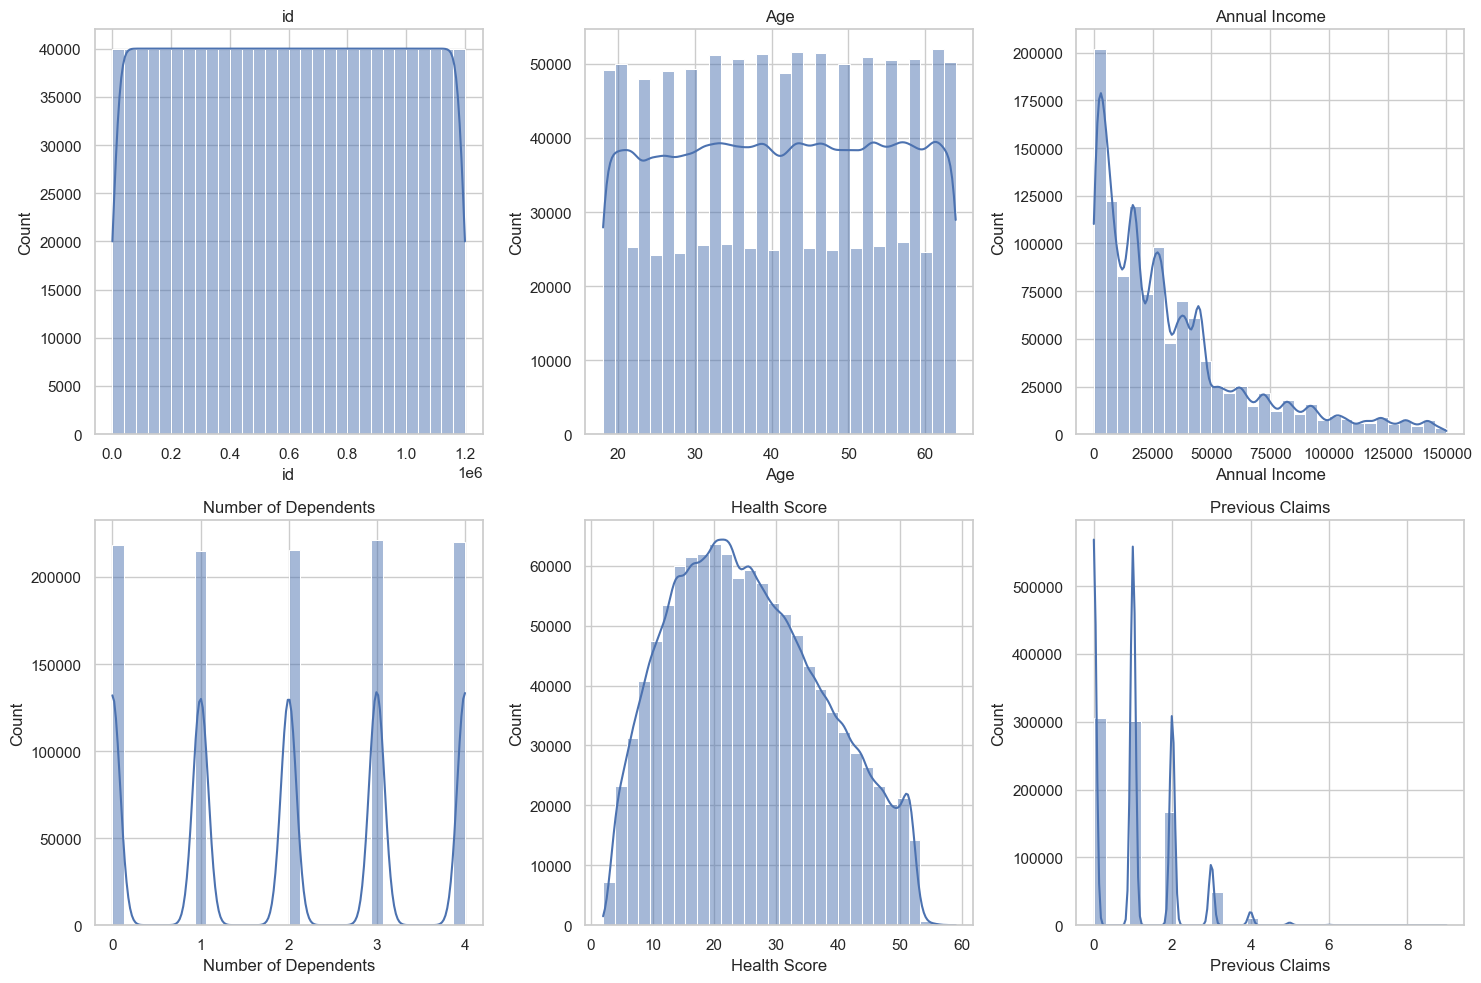


Value counts for 'Gender':
Gender
Male      602571
Female    597429
Name: count, dtype: int64

Value counts for 'Marital Status':
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

Value counts for 'Education Level':
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


In [2]:
# Step 4: Missing value percentages
missing = train.isnull().mean().sort_values(ascending=False) * 100
print("=== Percentage of Missing Values ===")
print(missing[missing > 0])

# Step 5: Numeric columns distribution
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:6], 1):  # plot first 6 numeric cols
    plt.subplot(2, 3, i)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 6: Example of categorical feature counts
cat_cols = train.select_dtypes(include=['object']).columns
for col in cat_cols[:3]:  # just first 3 for now
    print(f"\nValue counts for '{col}':")
    print(train[col].value_counts().head())


In [5]:
# Step 7: Data Cleaning & Imputation

# Fill missing numeric columns with median
num_cols = ['Age', 'Annual Income', 'Number of Dependents', 
             'Health Score', 'Credit Score', 'Previous Claims', 'Vehicle Age']
for col in num_cols:
    train[col] = train[col].fillna(train[col].median())

# Fill categorical columns with mode or 'Unknown'
cat_cols = ['Marital Status', 'Occupation', 'Customer Feedback']
for col in cat_cols:
    if train[col].isnull().sum() > 0:
        train[col] = train[col].fillna(train[col].mode()[0])

# Check again to confirm no missing values
print("Missing values after cleaning:")
print(train.isnull().sum().sum())


Missing values after cleaning:
1


In [3]:
# Identify which column still has a missing value
train.isnull().sum()[train.isnull().sum() > 0]


Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64

In [7]:
# Fill the last missing value in 'Insurance Duration'
train['Insurance Duration'].fillna(train['Insurance Duration'].median(), inplace=True)

# Verify again
print("Missing values after final cleaning:", train.isnull().sum().sum())


C:\Users\Volgapeter\AppData\Local\Temp\ipykernel_34056\9179109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Insurance Duration'].fillna(train['Insurance Duration'].median(), inplace=True)


Missing values after final cleaning: 0


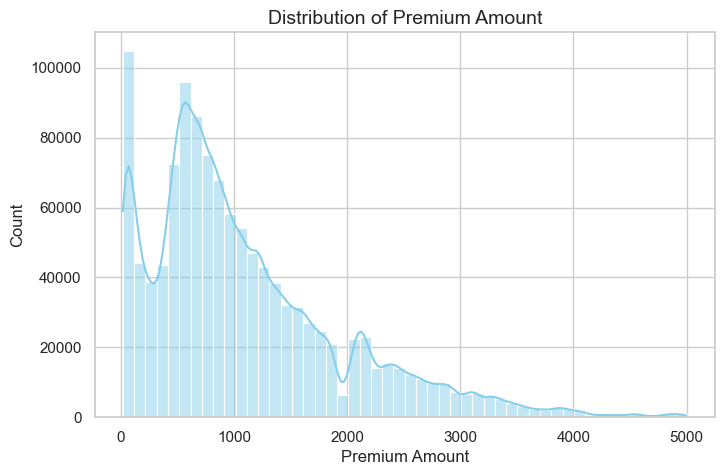

In [4]:
# Step 1: Distribution of Target Variable (Premium Amount)
plt.figure(figsize=(8,5))
sns.histplot(train['Premium Amount'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Premium Amount", fontsize=14)
plt.xlabel("Premium Amount")
plt.ylabel("Count")
plt.show()


C:\Users\Volgapeter\AppData\Local\Temp\ipykernel_34056\307231155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Insurance Duration', y='Annual Income', data=train, palette='cool')


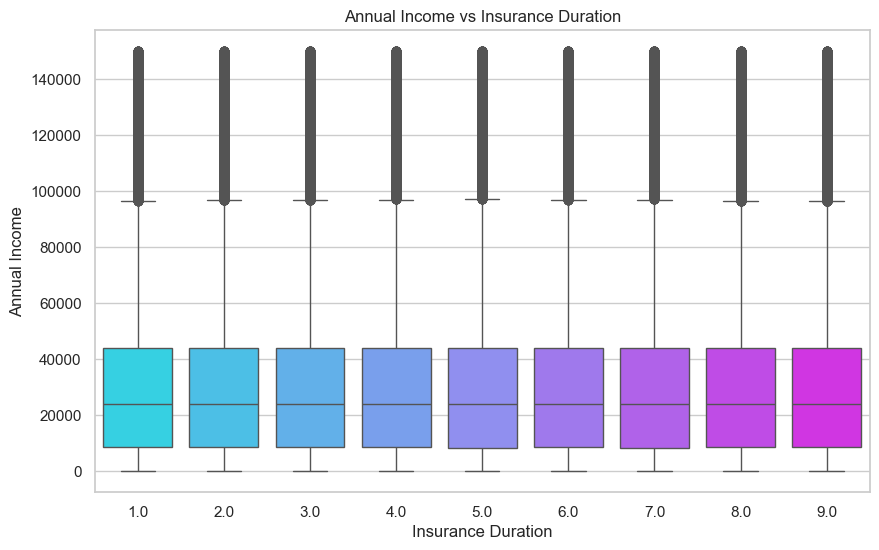

In [ ]:
#Bivariate Analysis (Relationships between variables)
#1. Annual Income vs Insurance Duration
plt.figure(figsize=(10,6))
sns.boxplot(x='Insurance Duration', y='Annual Income', data=train, palette='cool')
plt.title('Annual Income vs Insurance Duration')
plt.show()


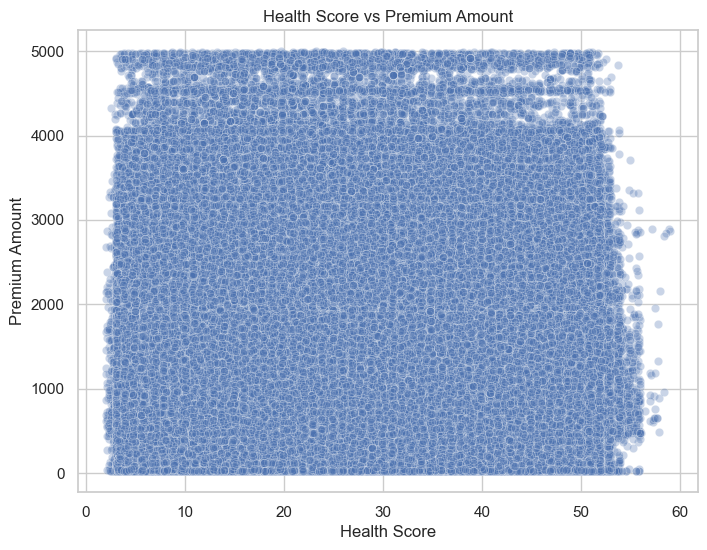

In [5]:
#2. Health Score vs Premium Amount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Health Score', y='Premium Amount', data=train, alpha=0.3)
plt.title('Health Score vs Premium Amount')
plt.show()


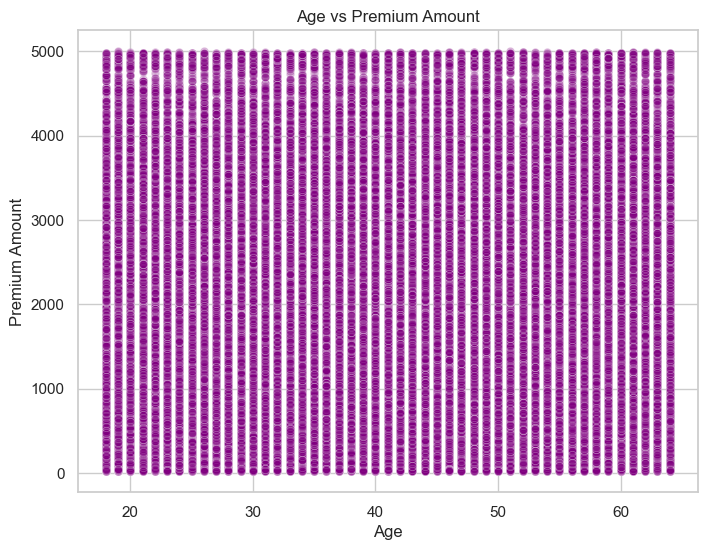

In [17]:
#3. Age vs Premium Amount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Premium Amount', data=train, alpha=0.3, color='purple')
plt.title('Age vs Premium Amount')
plt.show()


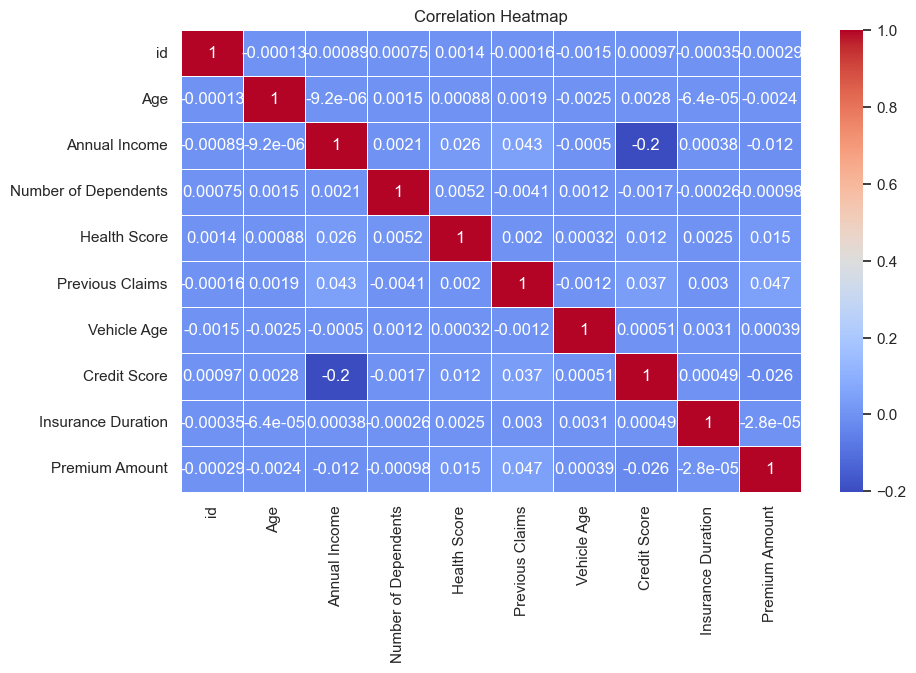

In [6]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Key Insights Summary
### 🔍 Key Insights
- Health Score is positively correlated with Premium Amount.
- Annual Income distribution is right-skewed.
- Most customers are Married and have Bachelor's or Master's degree.
- Missing data mainly in Occupation and Previous Claims columns (handled).


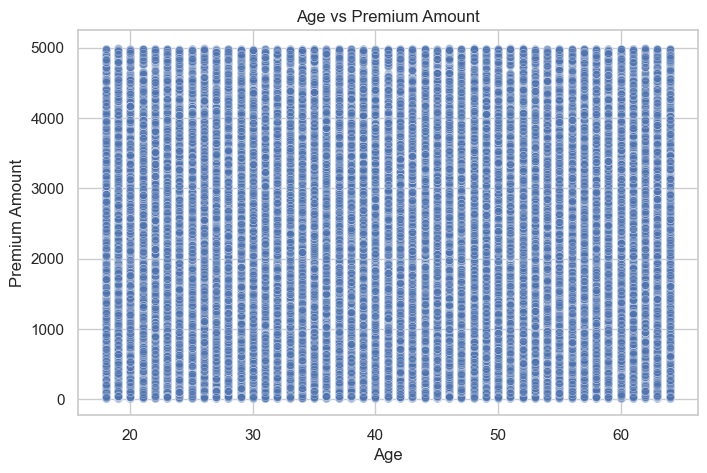

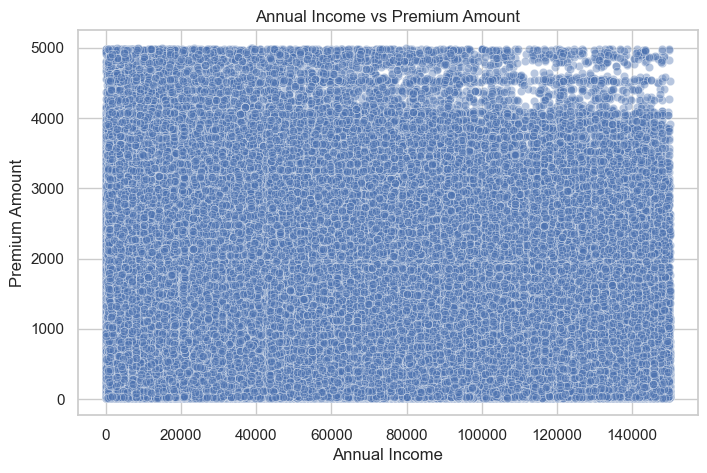

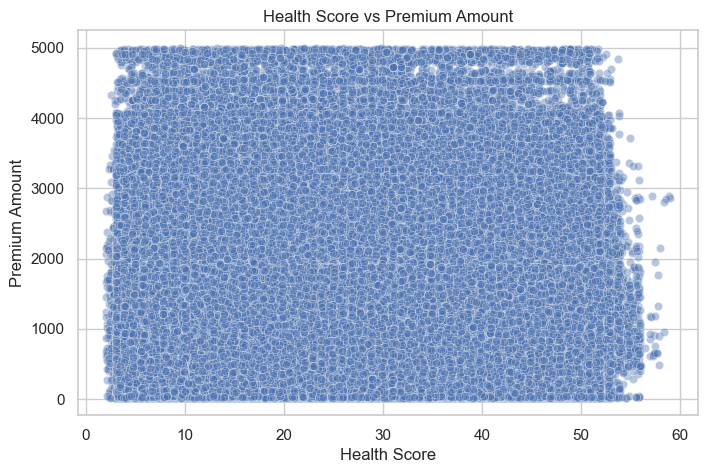

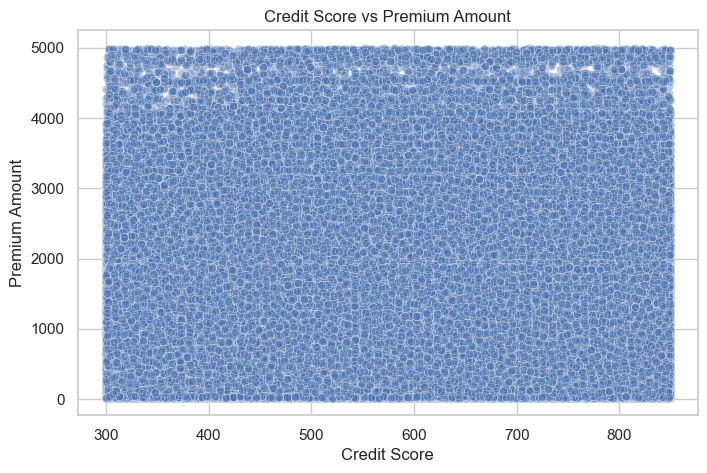

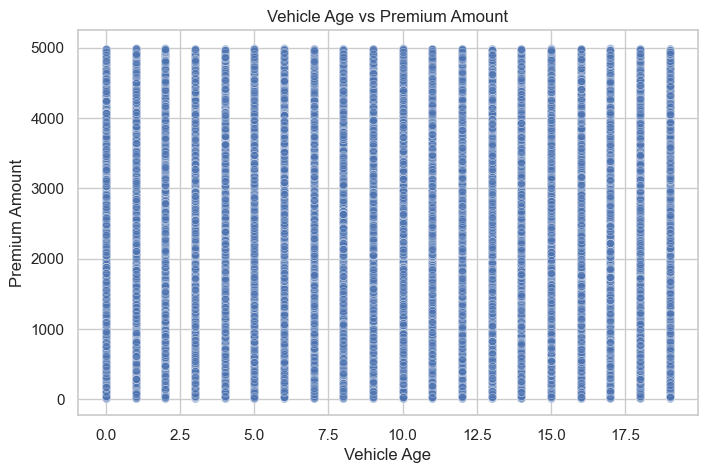

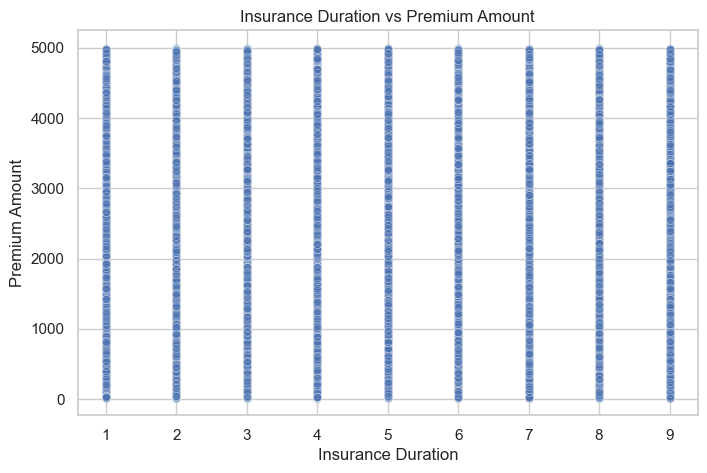

In [7]:
#Plot how numeric features relate to the target (Premium Amount):

import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Vehicle Age', 'Insurance Duration']

for feature in num_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=feature, y='Premium Amount', data=train, alpha=0.4)
    plt.title(f'{feature} vs Premium Amount')
    plt.show()

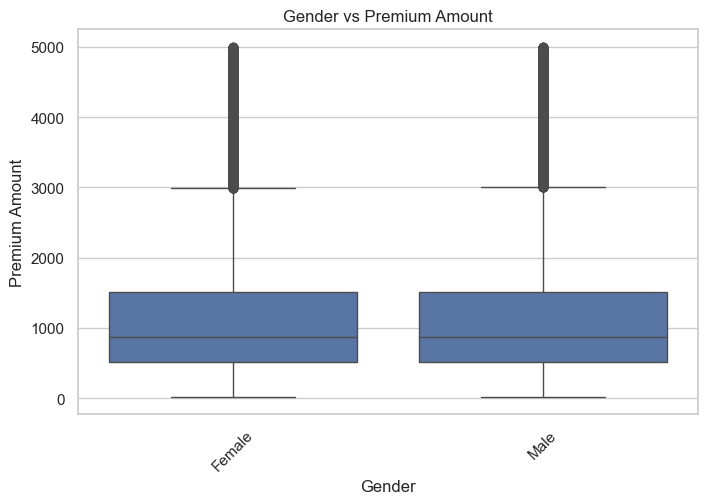

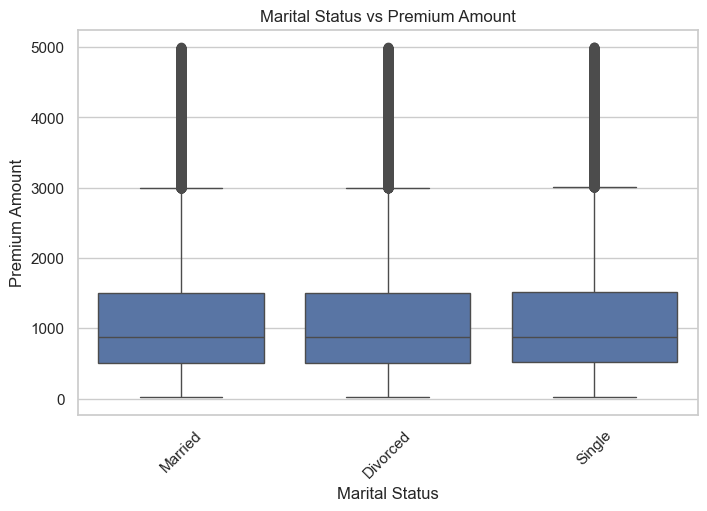

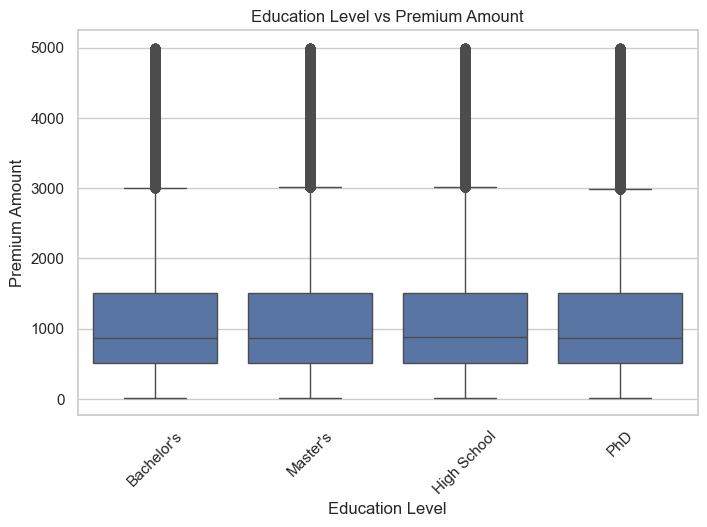

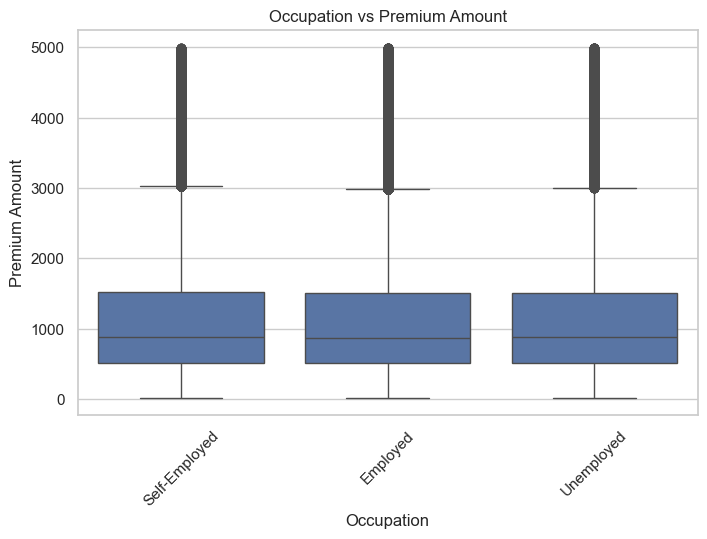

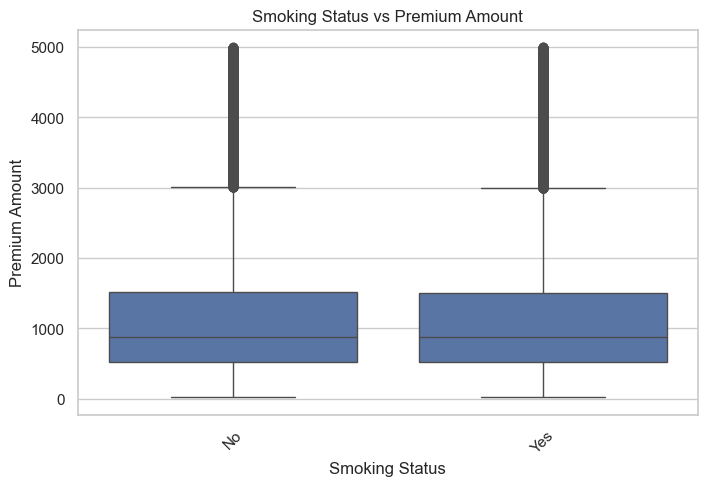

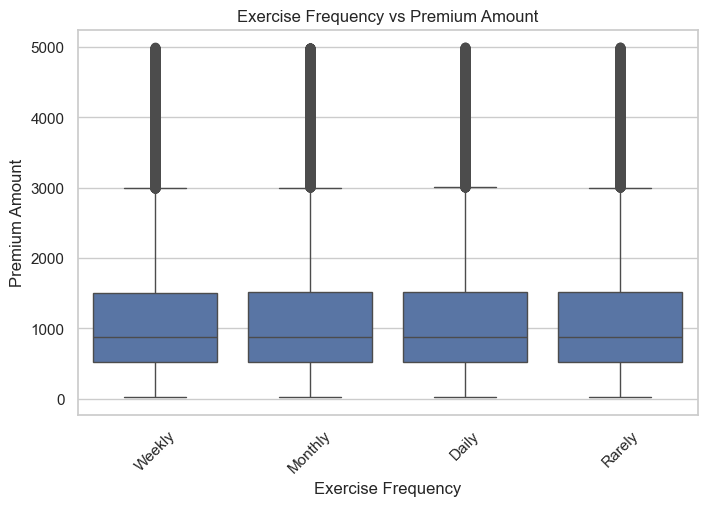

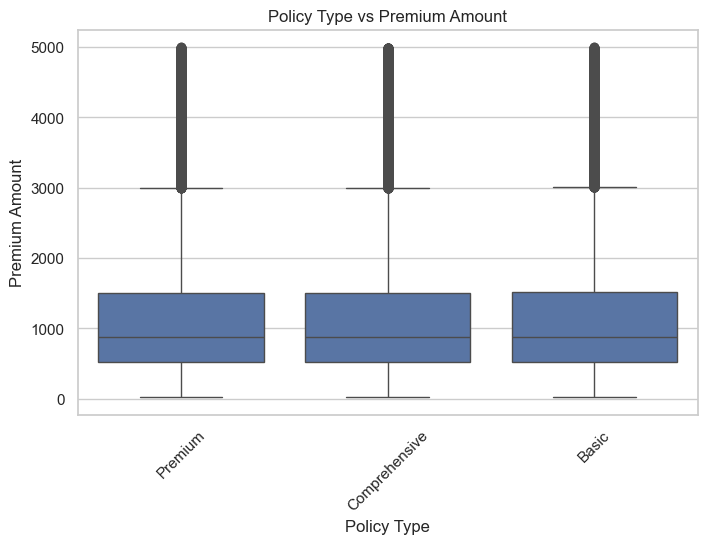

In [21]:
# analyze categorical features like gender, marital status, education, etc.

cat_features = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Smoking Status', 'Exercise Frequency', 'Policy Type']

for feature in cat_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=feature, y='Premium Amount', data=train)
    plt.title(f'{feature} vs Premium Amount')
    plt.xticks(rotation=45)
    plt.show()

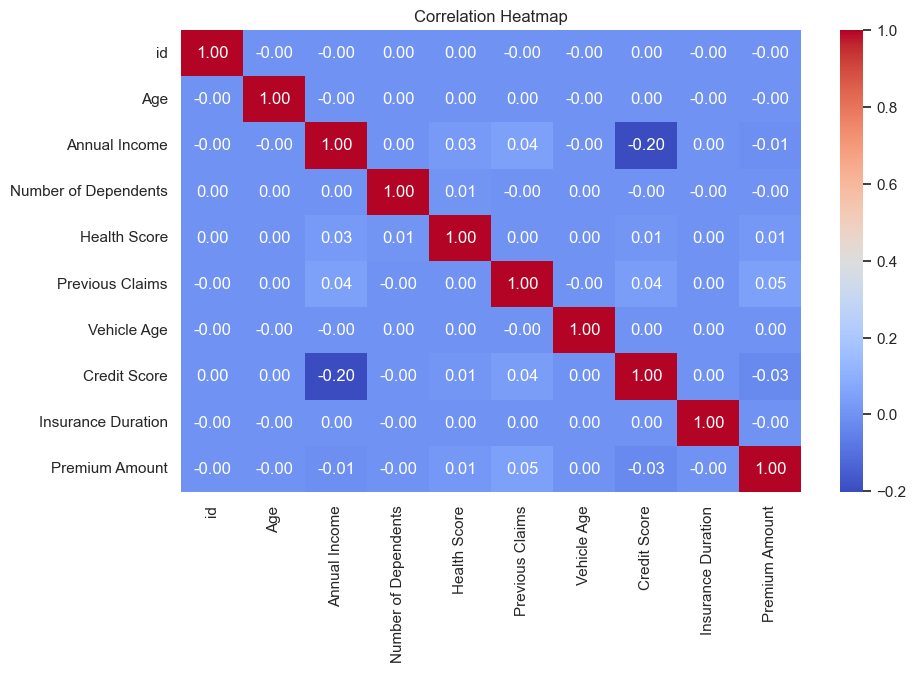

In [8]:
#Finding which numeric variables have the strongest relationship with the target:

plt.figure(figsize=(10,6))
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Key Insights from EDA
- Health Score and Credit Score positively correlate with Premium Amount.  
- Premium tends to increase with Age and Insurance Duration.  
- Married individuals and higher-educated customers pay higher premiums on average.  


# ==========================================================
# IMPORTS
# ==========================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)



# ==========================================================
# STEP 1: DEFINE FEATURES & TARGET
# ==========================================================
X = train.drop(columns=['Premium Amount'])
y = train['Premium Amount']

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)


# ==========================================================
# STEP 2: PREPROCESSING PIPELINE
# ==========================================================
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ]
)


# ==========================================================
# STEP 3: LINEAR REGRESSION PIPELINE
# ==========================================================
lr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_val)

lr_mae = mean_absolute_error(y_val, y_pred_lr)
lr_rmse = mean_squared_error(y_val, y_pred_lr, squared=False)
lr_r2 = r2_score(y_val, y_pred_lr)



# ==========================================================
# STEP 4: RANDOM FOREST PIPELINE
# ==========================================================
rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_val)

rf_mae = mean_absolute_error(y_val, y_pred_rf)
rf_rmse = mean_squared_error(y_val, y_pred_rf, squared=False)
rf_r2 = r2_score(y_val, y_pred_rf)



# ==========================================================
# STEP 5: MODEL COMPARISON
# ==========================================================
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R² Score': [lr_r2, rf_r2]
})

print("\n✅ MODEL EVALUATION RESULTS")
print(results)


In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
train = pd.read_csv("data/train.csv")  # or your actual file


In [11]:
X = train.drop(columns=[
    'Premium Amount',
    'id',
    'Policy Start Date',
    'Customer Feedback'
])

y = train['Premium Amount']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [18]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ]
)


In [19]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_val)


In [19]:
xgb_mae = mean_absolute_error(y_val, y_pred_xgb)
xgb_rmse = mean_squared_error(y_val, y_pred_xgb) ** 0.5
xgb_r2 = r2_score(y_val, y_pred_xgb)

print("XGBoost RMSE:", xgb_rmse)

import joblib
joblib.dump(xgb_pipeline, "smartpremium_model.pkl")

print("✅ Model saved successfully!")


XGBoost RMSE: 849.1868099541102
✅ Model saved successfully!


In [20]:
import joblib
joblib.dump(xgb_pipeline, "smartpremium_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [21]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'app.py', 'data', 'SmartPremium_EDA.ipynb', 'smartpremium_model.pkl', 'venv']
